In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [21]:
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import sklearn.preprocessing as pp
from sklearn.preprocessing import StandardScaler, LabelEncoder


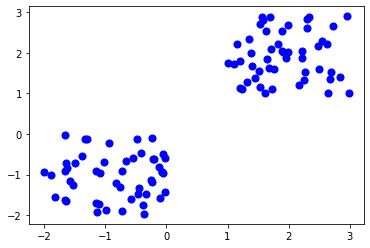

In [4]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [5]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [6]:
center = Kmean.cluster_centers_
center

array([[-0.84254678, -1.02574625],
       [ 1.92453109,  1.92520994]])

In [7]:
Kmean.predict(np.array([0,0]).reshape(1,-1))

array([0])

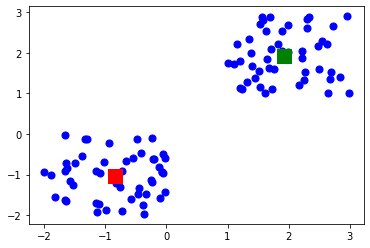

In [8]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.scatter(center[1][0],center[1][1], s=200, c='g', marker="s")
plt.scatter(center[0][0],center[0][1], s=200, c='r', marker="s")
plt.show()

In [14]:
cases = pd.read_csv("Datasets/Cleaned_Cases_by_Zipcode.csv")
cases

,Unnamed: 0,Zipcode,case_count,updatedate
0,0,91901,1,2020/04/01 08:00:00+00
1,1,91902,9,2020/04/01 08:00:00+00
2,2,91910,23,2020/04/01 08:00:00+00
3,3,91911,21,2020/04/01 08:00:00+00
4,4,91913,20,2020/04/01 08:00:00+00
...,...,...,...,...
12244,17225,92140,89,2020/08/30 08:00:00+00
12245,17226,92145,8,2020/08/30 08:00:00+00
12246,17227,92154,2334,2020/08/30 08:00:00+00
12247,17230,92173,1294,2020/08/30 08:00:00+00


In [18]:
updated = []

for i in range(len(cases)):
    updated.append(cases.loc[i]["updatedate"].split(" ")[0])

In [29]:
cases["updatedate"] = updated
cases

,Unnamed: 0,Zipcode,case_count,updatedate
0,0,91901,1,2020/04/01
1,1,91902,9,2020/04/01
2,2,91910,23,2020/04/01
3,3,91911,21,2020/04/01
4,4,91913,20,2020/04/01
...,...,...,...,...
12244,17225,92140,89,2020/08/30
12245,17226,92145,8,2020/08/30
12246,17227,92154,2334,2020/08/30
12247,17230,92173,1294,2020/08/30


In [41]:
july31 = cases[cases["updatedate"] == "2020/07/31"]
july31 = july31.rename(columns={"case_count": "July 31st Case Count"})
july31 = july31.drop("updatedate", axis=1)
july31

,Unnamed: 0,Zipcode,July 31st Case Count
11725,13732,91901,78
11726,13733,91902,169
11727,13734,91905,6
11728,13735,91906,16
11729,13736,91910,1223
...,...,...,...
11824,13835,92140,63
11825,13836,92145,7
11826,13837,92154,1810
11827,13840,92173,965


In [42]:
aug30 = cases[cases["updatedate"] == "2020/08/30"]
aug30 = aug30.rename(columns={"case_count": "August 30th Case Count"})
aug30 = aug30.drop("updatedate", axis=1)
aug30

,Unnamed: 0,Zipcode,August 30th Case Count
12144,17122,91901,96
12145,17123,91902,222
12146,17124,91905,7
12147,17125,91906,19
12148,17126,91910,1614
...,...,...,...
12244,17225,92140,89
12245,17226,92145,8
12246,17227,92154,2334
12247,17230,92173,1294


In [50]:
merged = july31.merge(aug30, on="Zipcode")
merged["Absolute Increase"] = merged["August 30th Case Count"] - merged["July 31st Case Count"]

merged["Percent Increase"] = round(merged["Absolute Increase"]/merged["July 31st Case Count"]*100, 2)

merged

,Unnamed: 0_x,Zipcode,July 31st Case Count,Unnamed: 0_y,August 30th Case Count,Absolute Increase,Percent Increase
0,13732,91901,78,17122,96,18,23.08
1,13733,91902,169,17123,222,53,31.36
2,13734,91905,6,17124,7,1,16.67
3,13735,91906,16,17125,19,3,18.75
4,13736,91910,1223,17126,1614,391,31.97
...,...,...,...,...,...,...,...
99,13835,92140,63,17225,89,26,41.27
100,13836,92145,7,17226,8,1,14.29
101,13837,92154,1810,17227,2334,524,28.95
102,13840,92173,965,17230,1294,329,34.09


In [53]:
file = open("Datasets\August_Case_Increase.csv","w+")
file.write(merged.to_csv())
file.close()

In [4]:
final_clean = pd.read_csv("Datasets\schools_data.csv")
final_clean.columns

Index(['Unnamed: 0', 'EILName', 'Latitude', 'Longitude', 'Address', 'Zipcode',
       'School, District', 'DistrictName', 'CumulativeEnrollment',
       'Median family income (dollars)', 'Mean family income (dollars)',
       'Health insurance coverage, % of civilian pop',
       'No health insurance for civilian pop',
       'No health insurance coverage %', 'Worked at home', 'Population 16+',
       'Children of the household 6-17', 'Households with income $0-34,999',
       'Households with income $35,000-99,999',
       'Households with income $100,000+', 'Percent Increase',
       'Absolute Increase Standardized', 'predictions'],
      dtype='object')

In [5]:
clustering_data = final_clean[['CumulativeEnrollment','Median family income (dollars)','Mean family income (dollars)',r'Health insurance coverage, % of civilian pop', 'No health insurance for civilian pop','No health insurance coverage %', 'Worked at home', 'Population 16+',
       'Children of the household 6-17', 'Households with income $0-34,999',
       'Households with income $35,000-99,999',
       'Households with income $100,000+', 'Percent Increase',
       'Absolute Increase Standardized' ]]
clustering_data

,CumulativeEnrollment,Median family income (dollars),Mean family income (dollars),"Health insurance coverage, % of civilian pop",No health insurance for civilian pop,No health insurance coverage %,Worked at home,Population 16+,Children of the household 6-17,"Households with income $0-34,999","Households with income $35,000-99,999","Households with income $100,000+",Percent Increase,Absolute Increase Standardized
0,94.0,59509.0,85640.0,79.6,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943
1,1064.0,59509.0,85640.0,79.6,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943
2,649.0,59509.0,85640.0,79.6,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943
3,833.0,59509.0,85640.0,79.6,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943
4,574.0,59509.0,85640.0,79.6,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,529.0,88391.0,103595.0,87.1,2484.0,12.9,764.0,15346.0,3017.0,1563.0,2031.0,2532.0,33.33,0.002150
614,249.0,41621.0,96089.0,80.2,447.0,19.8,186.0,1396.0,456.0,140.0,342.0,146.0,15.38,0.001433
615,370.0,76827.0,112047.0,94.3,293.0,5.7,336.0,4243.0,601.0,343.0,850.0,612.0,24.24,0.001885
616,960.0,76827.0,112047.0,94.3,293.0,5.7,336.0,4243.0,601.0,343.0,850.0,612.0,24.24,0.001885


In [8]:
kmeansFinal = KMeans(n_clusters = 2) 
kmeansFinal.fit(clustering_data) 

KMeans(n_clusters=2)

In [9]:
kmeansFinal.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [10]:
kmeansFinal.inertia_

646072899289.5829

In [11]:
pca = PCA(3)
pca.fit(clustering_data)
pca_data = pd.DataFrame(pca.transform(clustering_data)) 
pca_data.head()

,0,1,2
0,-30735.774939,490.512735,7767.313048
1,-30734.688572,484.399454,7759.946702
2,-30735.153358,487.014930,7763.098283
3,-30734.947284,485.855297,7761.700956
4,-30735.237356,487.487606,7763.667846


In [15]:
num_feat = [
    'CumulativeEnrollment', 
    'Median family income (dollars)', 
    'Mean family income (dollars)', 
    "Health insurance coverage, % of civilian pop", 
    "No health insurance for civilian pop", 
    "No health insurance coverage %", 
    "Worked at home", 
    "Households with income $0-34,999", 
    "Households with income $35,000-99,999", 
    "Households with income $100,000+",
    "Population 16+",
    "Children of the household 6-17",
    "Absolute Increase Standardized",
    "Percent Increase"
]
num_transformer = Pipeline(steps=[
    ('scaler', pp.StandardScaler())   # z-scale
])

# Categorical columns and associated transformers
cat_feat = ['EILName', 'Zipcode']
cat_transformer = Pipeline(steps=[
    ('intenc', pp.OrdinalEncoder()),   # converts to int
    ('onehot', pp.OneHotEncoder())     # output from Ordinal becomes input to OneHot
])

# preprocessing pipeline (put them together)
preproc = ColumnTransformer(transformers=[('num', num_transformer, num_feat), ('cat', cat_transformer, cat_feat)])

pl = Pipeline(steps=[('preprocessor', preproc), ('kmeans', KMeans(n_clusters=2, n_init=100))])

In [18]:
pl.fit(final_clean)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CumulativeEnrollment',
                                                   'Median family income '
                                                   '(dollars)',
                                                   'Mean family income '
                                                   '(dollars)',
                                                   'Health insurance coverage, '
                                                   '% of civilian pop',
                                                   'No health insurance for '
                                                   'civilian pop',
                                                   'No health insurance '
                      

In [19]:
predictions = pl.predict(final_clean)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [25]:
x = StandardScaler().fit_transform(clustering_data)
x

array([[-1.16111586, -0.8156892 , -0.50307843, ..., -0.54645971,
         0.97458751,  0.67492187],
       [ 0.58697922, -0.8156892 , -0.50307843, ..., -0.54645971,
         0.97458751,  0.67492187],
       [-0.16091713, -0.8156892 , -0.50307843, ..., -0.54645971,
         0.97458751,  0.67492187],
       ...,
       [-0.66371974, -0.24153914,  0.18547808, ..., -1.68727221,
        -0.47438694, -0.69312401],
       [ 0.39955459, -0.24153914,  0.18547808, ..., -1.68727221,
        -0.47438694, -0.69312401],
       [-0.15190633, -0.24153914,  0.18547808, ..., -1.68727221,
        -0.47438694, -0.69312401]])

In [36]:
standardized_clustering = pd.DataFrame(x)
standardized_clustering

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.161116,-0.815689,-0.503078,-2.061805,1.584890,2.061805,-0.137491,0.153374,0.595626,0.399235,0.057914,-0.546460,0.974588,0.674922
1,0.586979,-0.815689,-0.503078,-2.061805,1.584890,2.061805,-0.137491,0.153374,0.595626,0.399235,0.057914,-0.546460,0.974588,0.674922
2,-0.160917,-0.815689,-0.503078,-2.061805,1.584890,2.061805,-0.137491,0.153374,0.595626,0.399235,0.057914,-0.546460,0.974588,0.674922
3,0.170680,-0.815689,-0.503078,-2.061805,1.584890,2.061805,-0.137491,0.153374,0.595626,0.399235,0.057914,-0.546460,0.974588,0.674922
4,-0.296079,-0.815689,-0.503078,-2.061805,1.584890,2.061805,-0.137491,0.153374,0.595626,0.399235,0.057914,-0.546460,0.974588,0.674922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.377176,0.141846,-0.034906,-0.520812,-0.760685,0.520812,-0.934984,-1.490095,-1.168021,-1.086067,-1.637722,-0.973567,0.059724,-0.574573
614,-0.881781,-1.408737,-0.230623,-1.938526,-1.338289,1.938526,-1.779216,-2.402879,-1.927385,-1.736600,-2.252695,-1.860494,-0.994984,-0.895733
615,-0.663720,-0.241539,0.185478,0.958541,-1.381956,-0.958541,-1.560125,-2.216592,-1.884391,-1.643798,-2.067730,-1.687272,-0.474387,-0.693124
616,0.399555,-0.241539,0.185478,0.958541,-1.381956,-0.958541,-1.560125,-2.216592,-1.884391,-1.643798,-2.067730,-1.687272,-0.474387,-0.693124


In [44]:
for i in range(6):
    kmeansStand = KMeans(n_clusters = 6) 
    kmeansStand.fit(standardized_clustering) 
    print(kmeansStand.inertia_)

3135.64144406371
3142.5331315117132
3102.262790250959
3122.8206072254493
3102.262790250959
3131.5826829396337


In [46]:
kmeansStand.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 0,

In [30]:
kmeansStand.inertia_

5807.845823325998

In [31]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    return sse


In [34]:
temp = calculate_WSS(x,6)
temp

[1235.9999999999993]

In [45]:
pcastan = PCA(3)
pcastan.fit(standardized_clustering)
pca_stan = pd.DataFrame(pcastan.transform(standardized_clustering)) 
pca_stan.head()

,0,1,2
0,-3.096255,1.019049,-0.452032
1,-3.075661,0.761933,0.815387
2,-3.084472,0.871936,0.273141
3,-3.080565,0.823164,0.513558
4,-3.086064,0.891816,0.175145


In [52]:
kmeansPCAStand = KMeans(n_clusters = 3) 
kmeansPCAStand.fit(pca_stan) 
print(kmeansPCAStand.inertia_)
kmeansPCAStand.labels_

2846.5549014577823


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,

In [53]:

from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/3) 
cluster_colors = colors[5 : -5 : skips] 

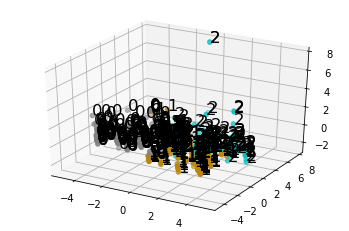

In [54]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_stan[0], pca_stan[1], pca_stan[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeansPCAStand.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeansPCAStand.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_stan[0], pca_stan[1], 
        pca_stan[2], str_labels)) 
   
plt.show() 